# GESTION DE PORTEFEUILLE - Assignement 1


#### Hugo Lamarre - HEC Montréal
#### Hiver 2023

### Etudiants

CARON Sébastien  - 11271997 

LEPEYTRE Vincent - 11237013

NONGUIERMA Harold  -

TOURÉ Ousmane  -

In [358]:
import importlib
import numpy as np
import Functions as f
import Gurobi as g
importlib.reload(f)
importlib.reload(g)

import numpy as np
import pandas as pd
from scipy import optimize
import scipy.optimize as sco



#### Data Importation

In [359]:
path_data = r"C:\Users\admin\Desktop\Gestion ptf (cours)\TP1_part1\seb_version\48_Industry_Portfolios.csv"
path_rf = r"C:\Users\admin\Desktop\Gestion ptf (cours)\TP1_part1\seb_version\SOFR30DAYAVG.xls"
path_regression = r"C:\Users\admin\Desktop\Gestion ptf (cours)\TP1_part1\iShares MSCI USA Factor ETF bis1.xlsx"

In [360]:
### Monthly data on 48 Industry Portfolios from Ken French’s website

Data = f.Load_ind_data(path_data)["Data"]
Data = Data[Data.index >= '2000-01'] # We keep only the data after 2000

Data_select = Data[['Meals','Guns','Hshld','Oil','Txtls']]

Industrie_selected = Data_select.columns


C:\Users\admin\Gestion_PTF\Seb_version\v2\Gurobi\Functions.py:20: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x,'%Y%m')


In [361]:
### Risk free asset : 30-Day Average SOFR, Percent, Daily, Not Seasonally Adjusted

Expected_Risk_free = f.Load_rf(path_rf)/100


In [362]:
### Data for the determination of expected returns :

Variable_regression = f.Load_lasso_variable(path_regression)

## Determination of expected returns
### Multiple linear regression with regularization by lasso method :

#### 1/ Data set split betwen  train and test set : 

In [363]:
# Data use for the split : 

First_factor_obs = '2013-09-01'
Date_train = '2020-01-01' # Train set end
Date_test = '2021-06-01' # Test set beginning 
Last_date = '2022-12-01'

Variable_regression = Variable_regression[Variable_regression.index >= First_factor_obs]

Data_regression_lasso = f.Split_dataset(Data,Variable_regression,First_factor_obs,Date_train,Date_test,Last_date)

C:\Users\admin\Gestion_PTF\Seb_version\v2\Gurobi\Functions.py:385: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])


#### 2/ Prediction : 

In [364]:
Resultat_prediction  = f.Lasso_regression(Data_regression_lasso)

#### 3/ Performance of  prediction : 

In [365]:
# R_squared moyen (Train set) :
Resultat_prediction.loc['R_squared_train'].median()

13.279726678521158

In [366]:
# R_squared moyen (Test set) :
Resultat_prediction.loc['R_squared_test'].median()

6.544141099740797

In [367]:
# MSE lasso prediction / MSE with naive historical mean :
Resultat_prediction.loc['ratio_mse'].median()

0.9204068953848257

#### 4/ Results : 

In [368]:
# Select only the prediction where the lasso approch perform better on the train set base on MSE ratio and R square

E_return_select = f.select_pred(Resultat_prediction,Data)

C:\Users\admin\Gestion_PTF\Seb_version\v2\Gurobi\Functions.py:587: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)


In [369]:
E_return = E_return_select[['Meals','Guns','Hshld','Oil','Txtls']]

## Question 1
### (a) Graph the mean-variance frontier without risk-free asset of the selected 5 industry portfolios.
Display each industry portfolio in the chart.

#### Estimation of the covariance-matrix and expected return   :

In [370]:
# Expected return : other possible approach simple machine learning with technical indicator 
E_return = Data_select.mean()/100  #On a besoin des rendement annualisées comme le risk free rate est annualisé 
E_cov = Data_select.cov() # Just for test
Nbr_PTF = 100
K = 5 #On veut 5 Assets

##### Determination of the optimal  portfolio  for a given return (with Short Sell) :

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

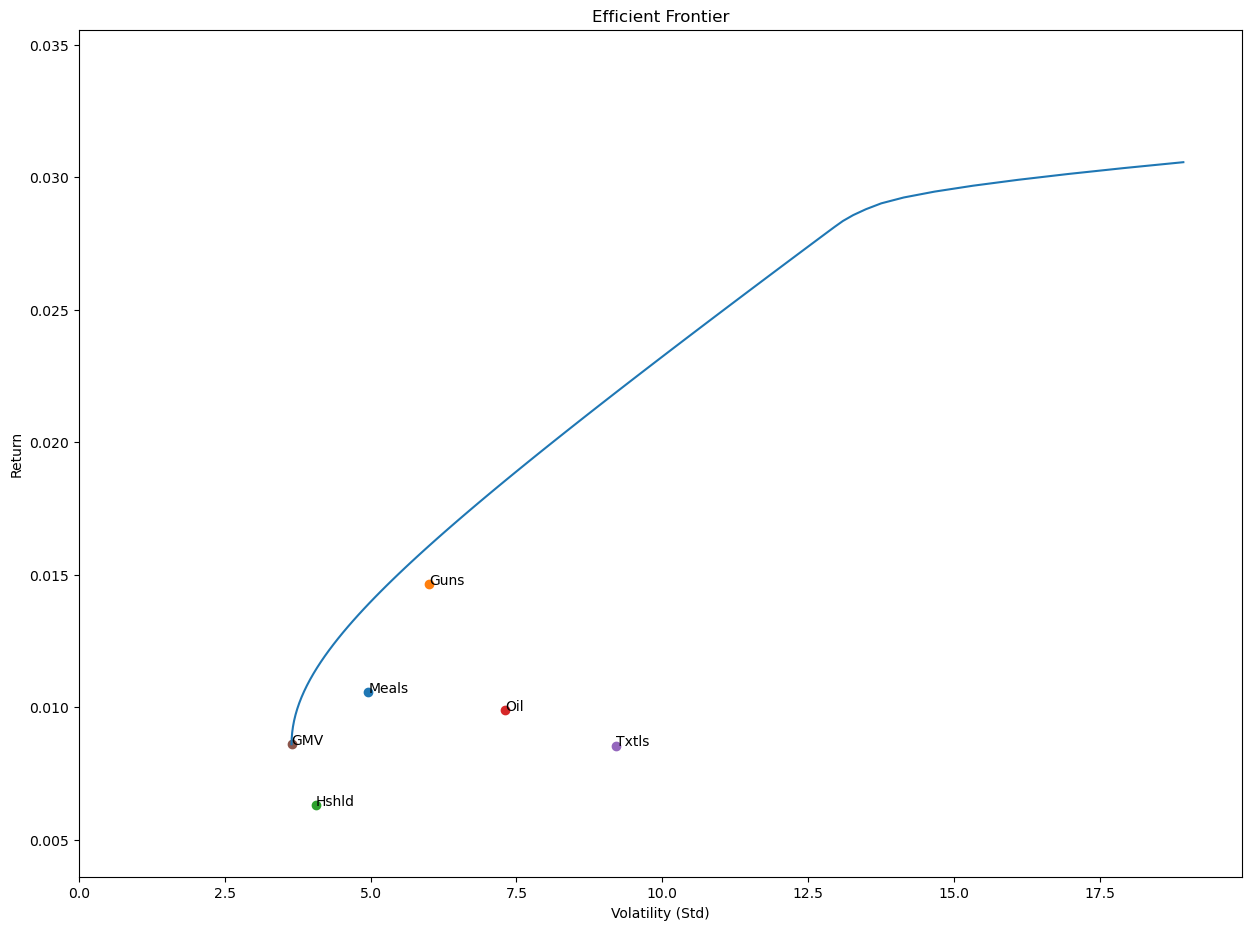

In [371]:
g.plot_ef_Gurobi(E_return, E_cov, Expected_Risk_free, K, Nbr_PTF, bounds = (-2,2), show_cml=False, show_gmv=True)

### (b) Graph the mean-variance frontier with risk-free asset of the selected 5 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.



<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

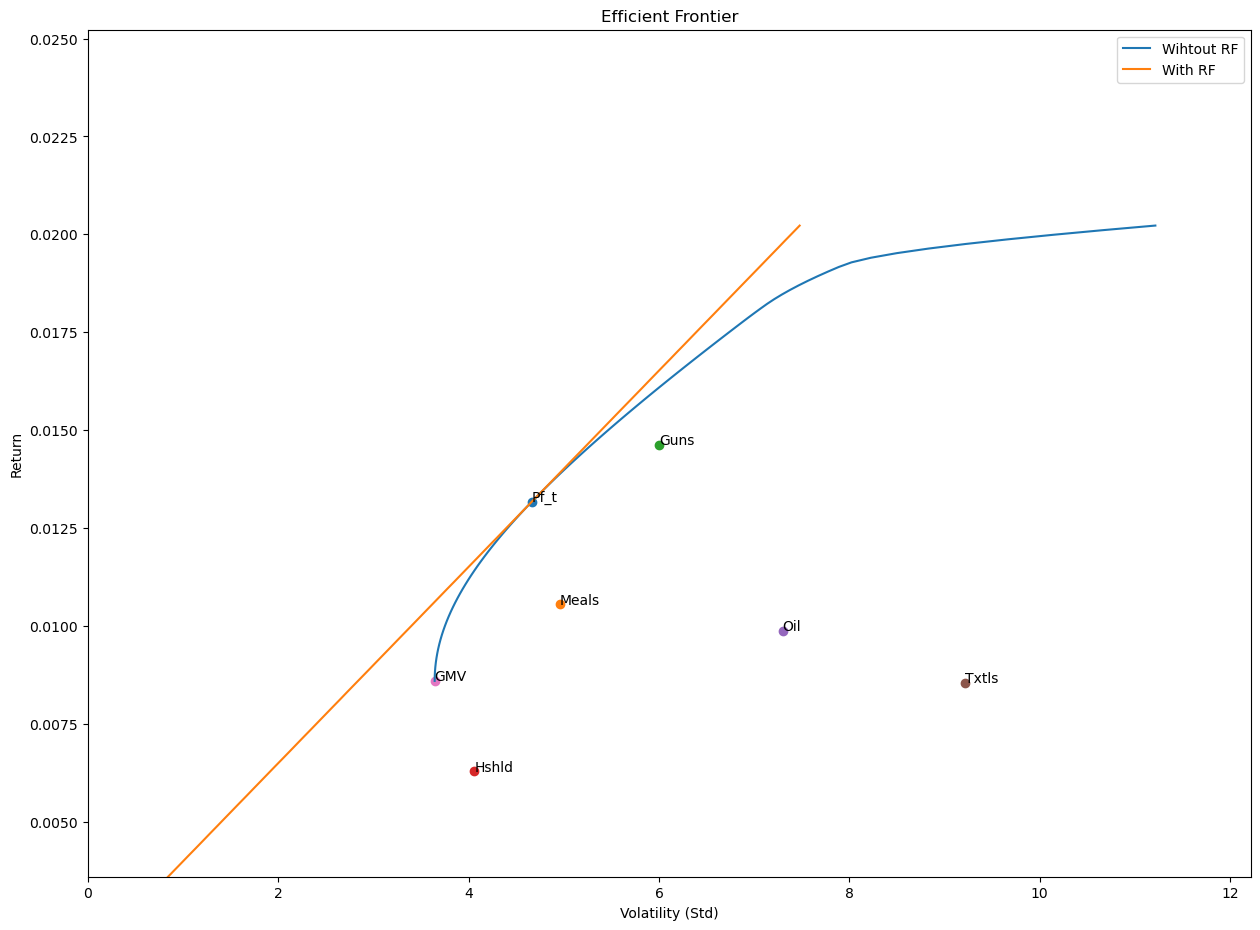

In [381]:
g.plot_ef_Gurobi(E_return, E_cov, Expected_Risk_free, K , Nbr_PTF, bounds = (-1,1), show_cml=True, show_gmv=True)

#### Explanations: 

### (c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset


In [382]:
result = g.tangent_Gurobi(E_return, E_cov, Expected_Risk_free, K , Nbr_PTF = 100, bounds= (-2,2))
result


,Meals,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
21,0.5874,0.5797,0.0191,0.0347,-0.2209,0.01326,4.697644,0.002505


### (d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.



<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

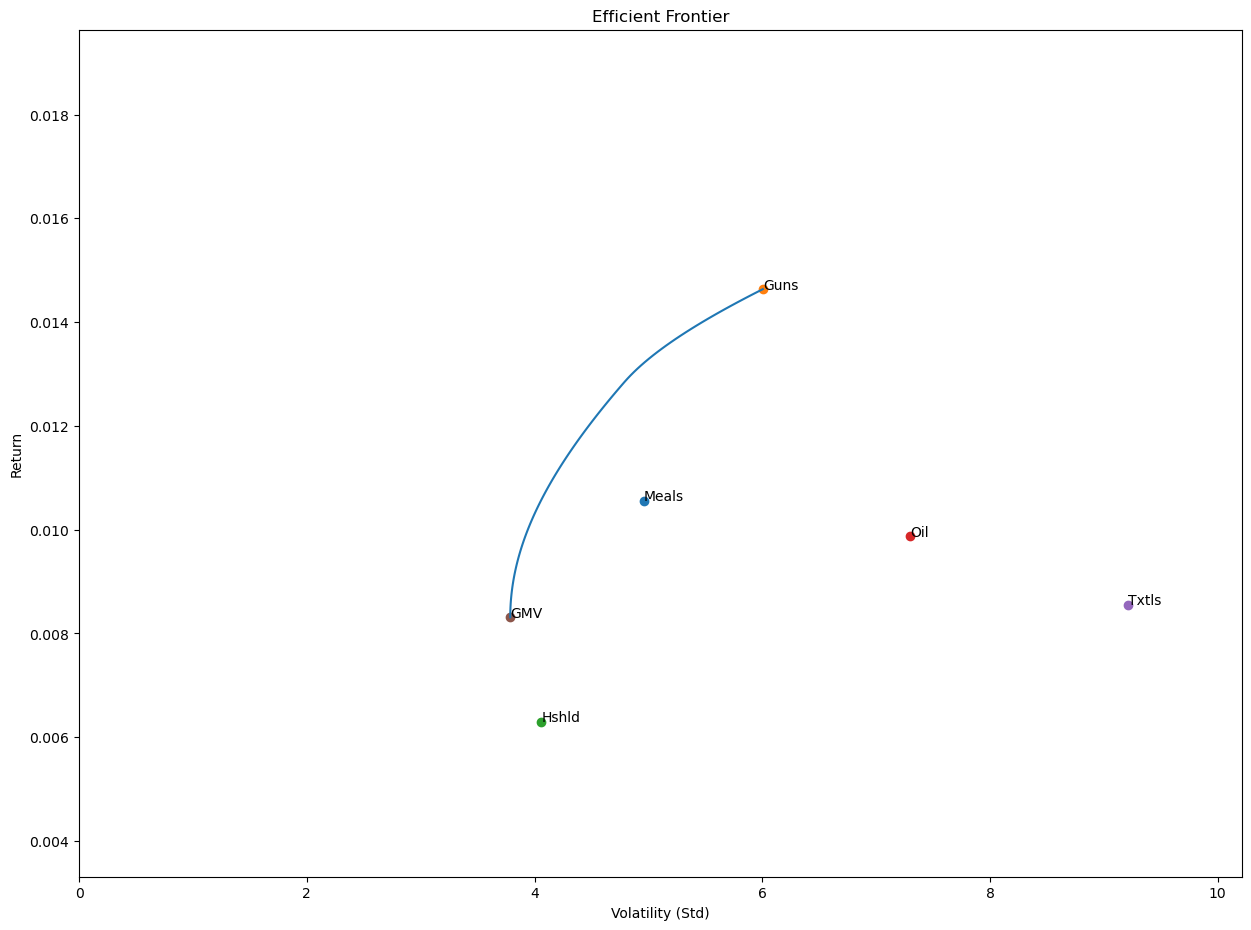

In [383]:
g.plot_ef_Gurobi(E_return, E_cov, Expected_Risk_free, K , Nbr_PTF, bounds = (0, 1), show_cml=False, show_gmv=True)

#### Explain how the mean-variance frontier has changed with the constraint: (To continue)

### (e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

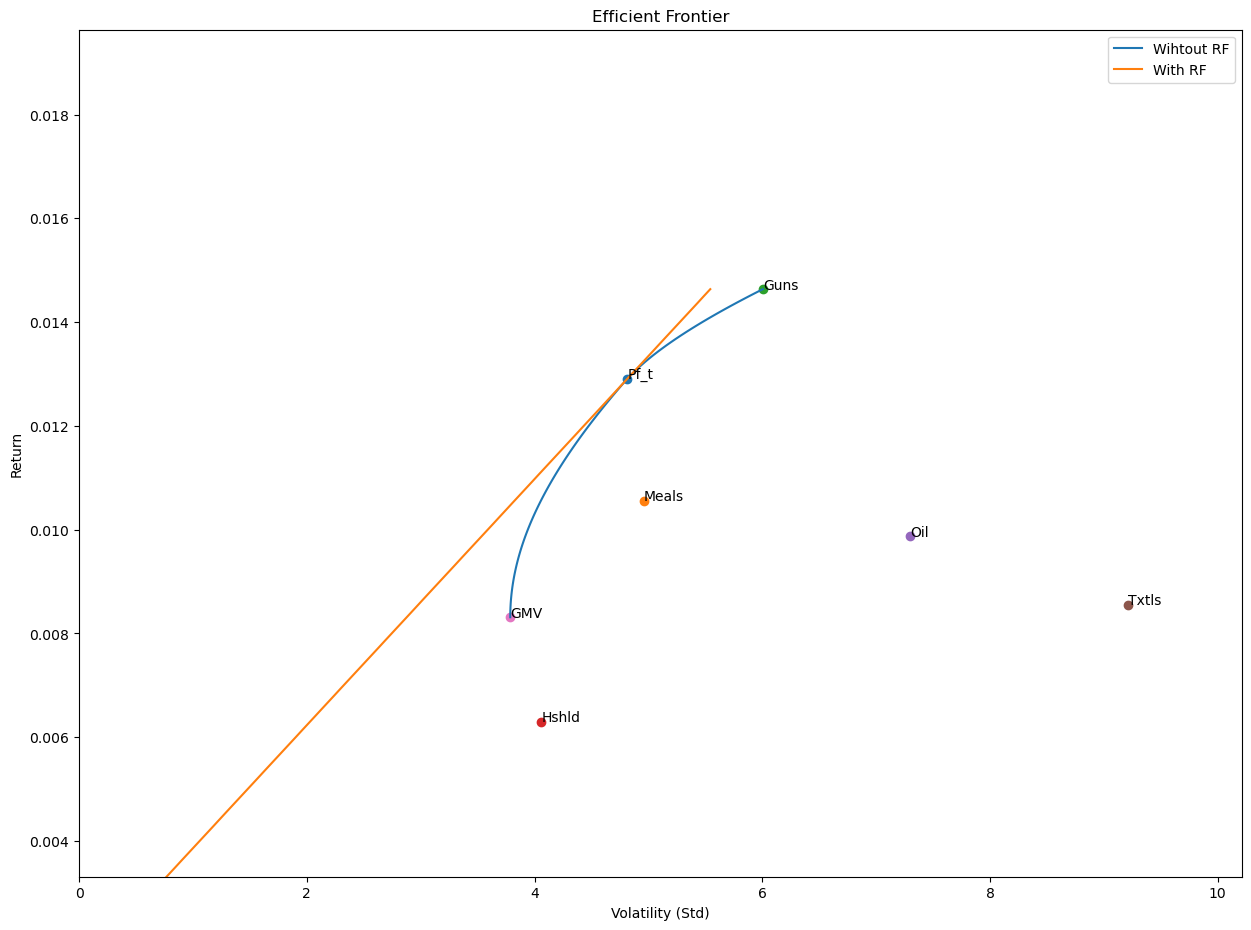

In [384]:
g.plot_ef_Gurobi(E_return, E_cov, Expected_Risk_free, K , Nbr_PTF, bounds = (0, 1), show_cml=True, show_gmv=True)

#### Explain how the mean-variance frontier has changed with the constraint:

(To Continue)

### (f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [385]:
result = g.tangent_Gurobi(E_return, E_cov, Expected_Risk_free, K , Nbr_PTF = 100, bounds= (0,1))
result



,Meals,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
72,0.4229,0.577,0.0,0.0001,0.0,0.012911,4.816075,0.002371


Explain:

### (g) Repeat the same calculations in (a)-(f) adding 5 other industry portfolios to the original list of 5 industry portfolios you chose at the start. Compare the results and discuss the advantages and disadvantages of using 10 portfolios instead of 5.

In [386]:
#On pourrait randomnize le sampling

Data_select2_names = ['Meals','Guns','Hshld','Oil','Txtls','Food', 'Util', 'Chems', 'Drugs', 'Rtail']
Data_select2 = Data[Data_select2_names]

#E_return_M_2 =Resultat_prediction[Data_select2_names].loc['E_R'].T

E_return_2 = E_return_select[Data_select2_names]
#E_return_2 = f.annualize_rets_prediction(E_return_M_2, 12)

# Expected return : other possible approach simple machine learning with technical indicator 
#E_return = g.annualize_rets(Data_select2/100, 12)  #On a besoin des rendement annualisées comme le risk free rate est annualisé 
E_cov = Data_select2.cov() # Just for test
Nbr_PTF = 100
K = 10

#### g-(a) Graph the mean-variance frontier without risk-free asset of the selected 10 industry portfolios.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

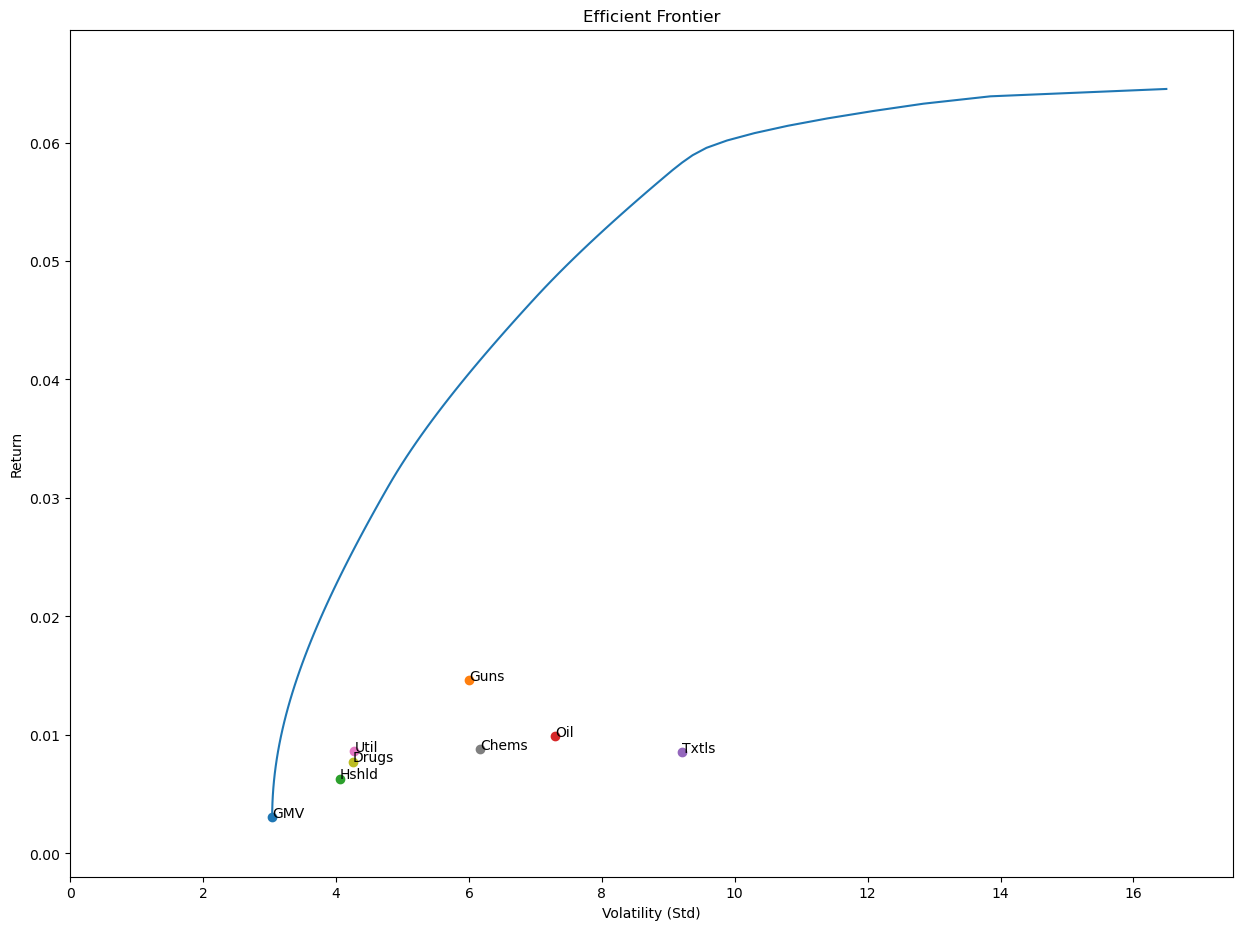

In [387]:
g.plot_ef_Gurobi(E_return_2, E_cov, Expected_Risk_free, K, Nbr_PTF, bounds = (-1,1), show_cml=False, show_gmv=True)

#### g-(b) Graph the mean-variance frontier with risk-free asset of the selected 10 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

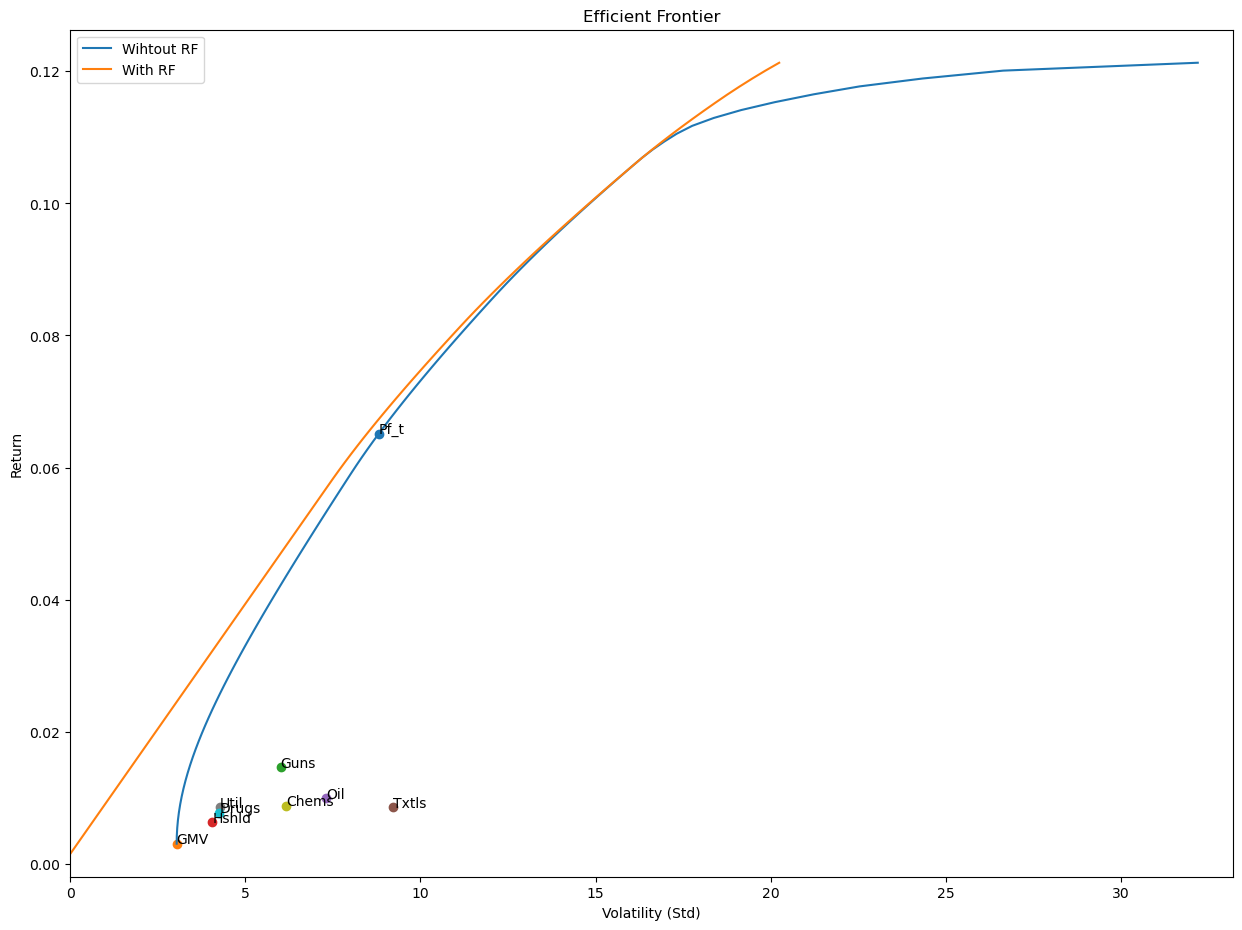

In [388]:
g.plot_ef_Gurobi(E_return_2, E_cov, Expected_Risk_free, K, Nbr_PTF, bounds = (-2,2), show_cml=True, show_gmv=True)

#### g-(c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset

In [389]:
result = g.tangent_Gurobi(E_return_2, E_cov, Expected_Risk_free, K , Nbr_PTF, bounds= (-2,2))

result

,Meals,Guns,Hshld,Oil,Txtls,Food,Util,Chems,Drugs,Rtail,Return,Volatility,Sharpe
52,-2.0,0.7189,0.9657,0.139,0.1076,-1.0213,0.9607,0.4849,0.5962,0.0484,0.065155,8.813622,0.007223


#### g-(d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

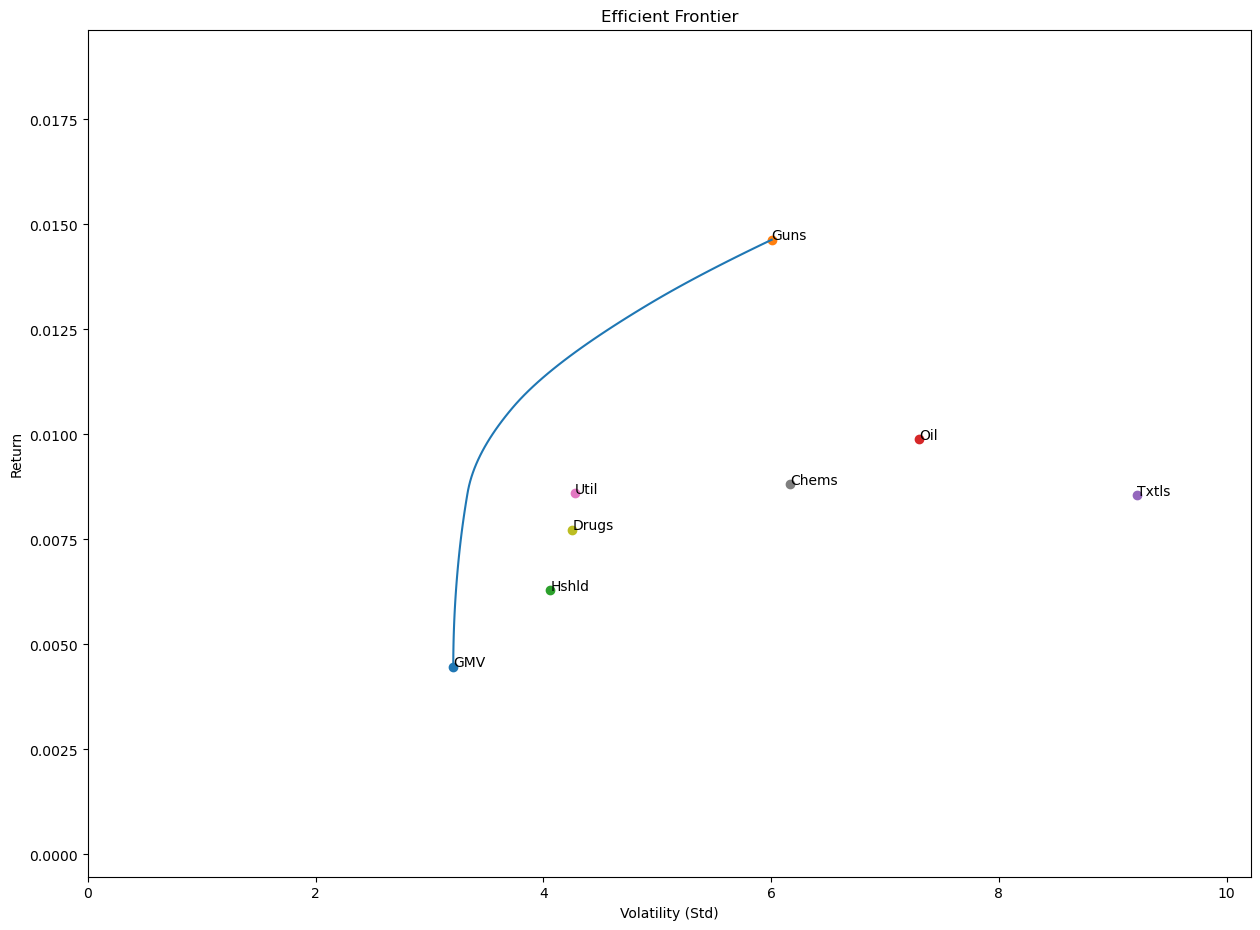

In [390]:
g.plot_ef_Gurobi(E_return_2, E_cov, Expected_Risk_free, K, Nbr_PTF, bounds = (0,1), show_cml=False, show_gmv=True)

#### g-(e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

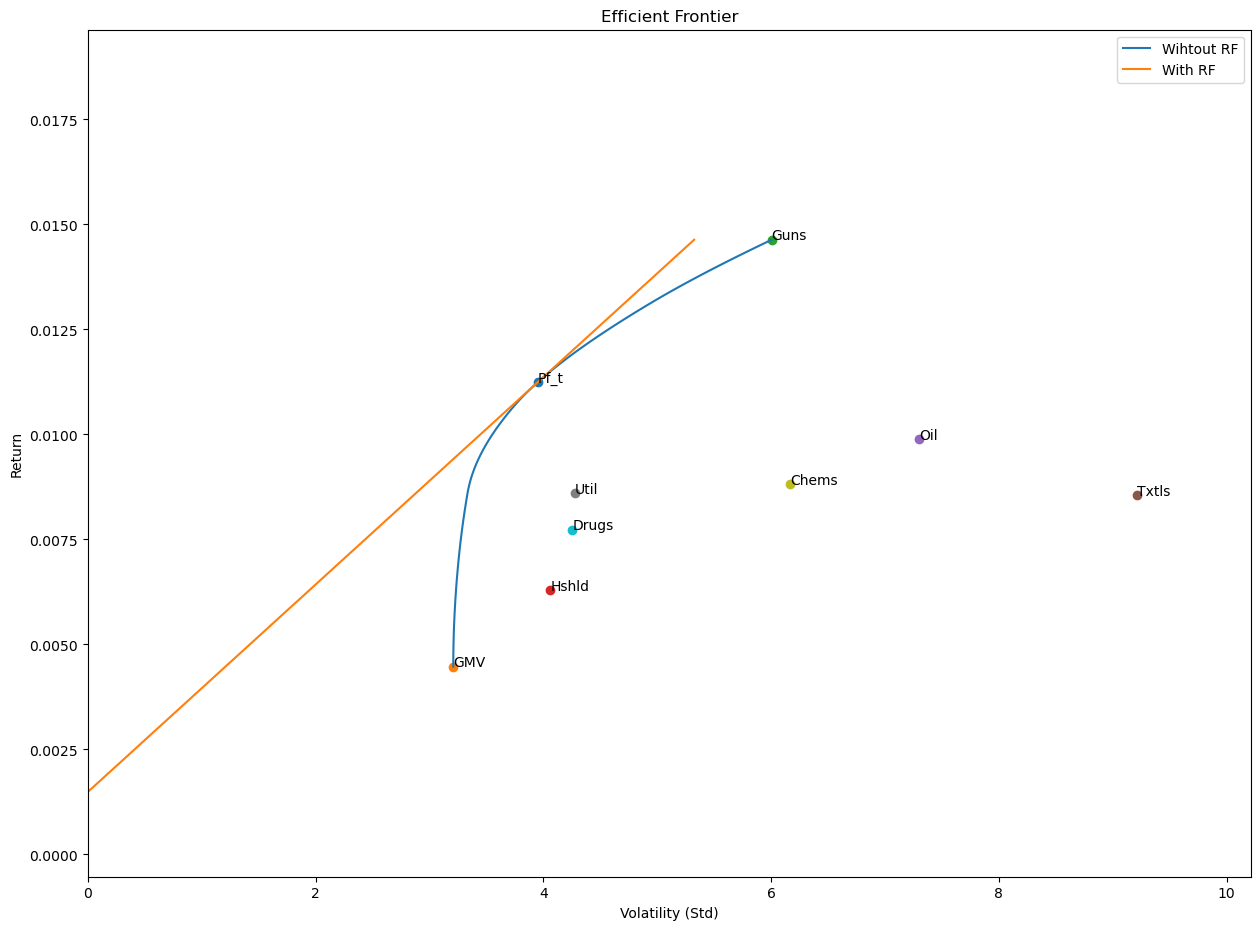

In [391]:
g.plot_ef_Gurobi(E_return_2, E_cov, Expected_Risk_free, K, Nbr_PTF, bounds = (0,1), show_cml=True, show_gmv=True)

#### g-(f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [392]:
result = g.tangent_Gurobi(E_return_2, E_cov, Expected_Risk_free, K , Nbr_PTF, bounds= (0,1))

result

,Meals,Guns,Hshld,Oil,Txtls,Food,Util,Chems,Drugs,Rtail,Return,Volatility,Sharpe
66,0.0,0.467,0.0,0.0,0.0,0.0,0.3334,0.0,0.1996,0.0,0.011247,3.95141,0.002468


### (h) The investment policy statement now limits you to invest in up to 3 industry portfolios from the original list of 5 industry portfolios. Repeat the same calculations in (a)-(f) with this additional constraint on the maximum number of assets. Is the optimal combination of assets the same for every target expected return?

In [393]:
#Est-ce qu'on fait une contrainte dans l'optimisateur?
#On peut prendre les 3 maximum weight in abs(value)

E_cov = Data_select.cov() # Just for test
Nbr_PTF = 100
K=3

#### h-(a) Graph the mean-variance frontier without risk-free asset of the selected 3 industry portfolios. vs 5


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

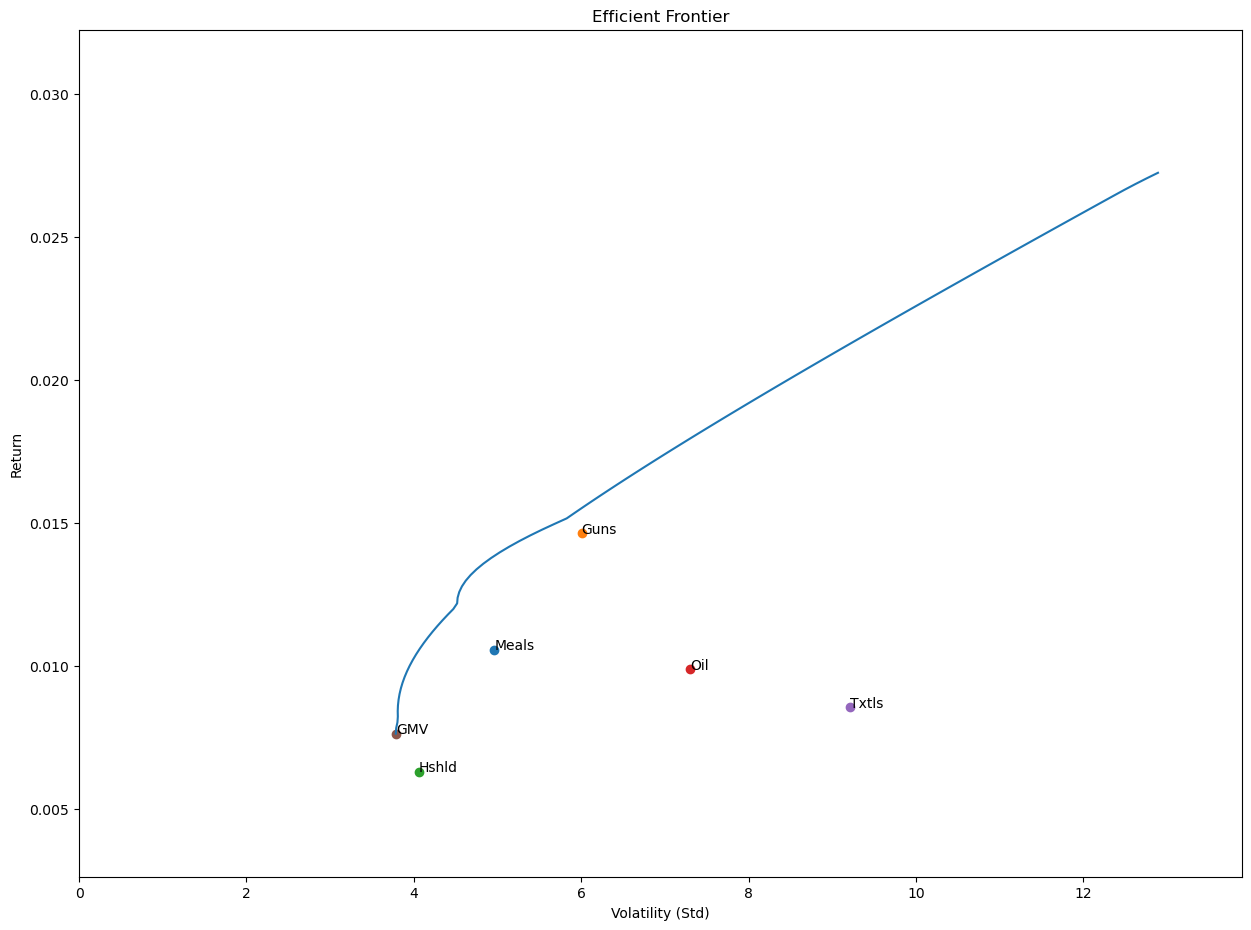

In [394]:
g.plot_ef_Gurobi(E_return, E_cov, Expected_Risk_free, K, Nbr_PTF, bounds = (-2,2), show_cml=False, show_gmv=True)



#### h-(b) Graph the mean-variance frontier with risk-free asset of the selected 3 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

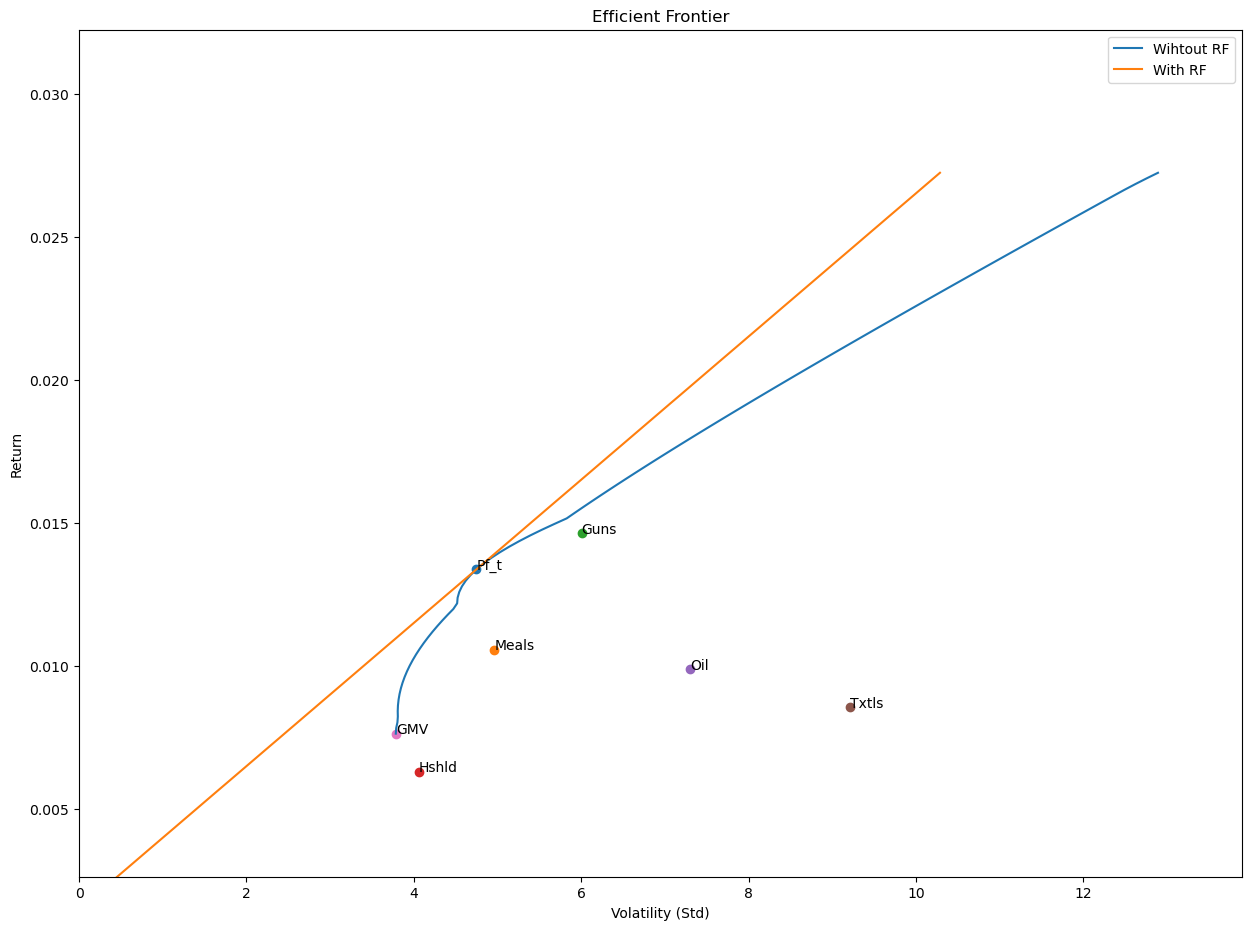

In [395]:
g.plot_ef_Gurobi(E_return, E_cov, Expected_Risk_free, K, Nbr_PTF, bounds = (-2,2), show_cml=True, show_gmv=True)

#### h-(c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset

In [396]:
#Trouver portefeuille maximum sharp ratio (Regler probleme de la fonction ou expliquer)
result = g.tangent_Gurobi(E_return, E_cov, Expected_Risk_free, K, Nbr_PTF, bounds= (-2,2))
result


,Meals,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
29,0.6283,0.5852,0.0,0.0,-0.2135,0.013373,4.748694,0.002502


#### h-(d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

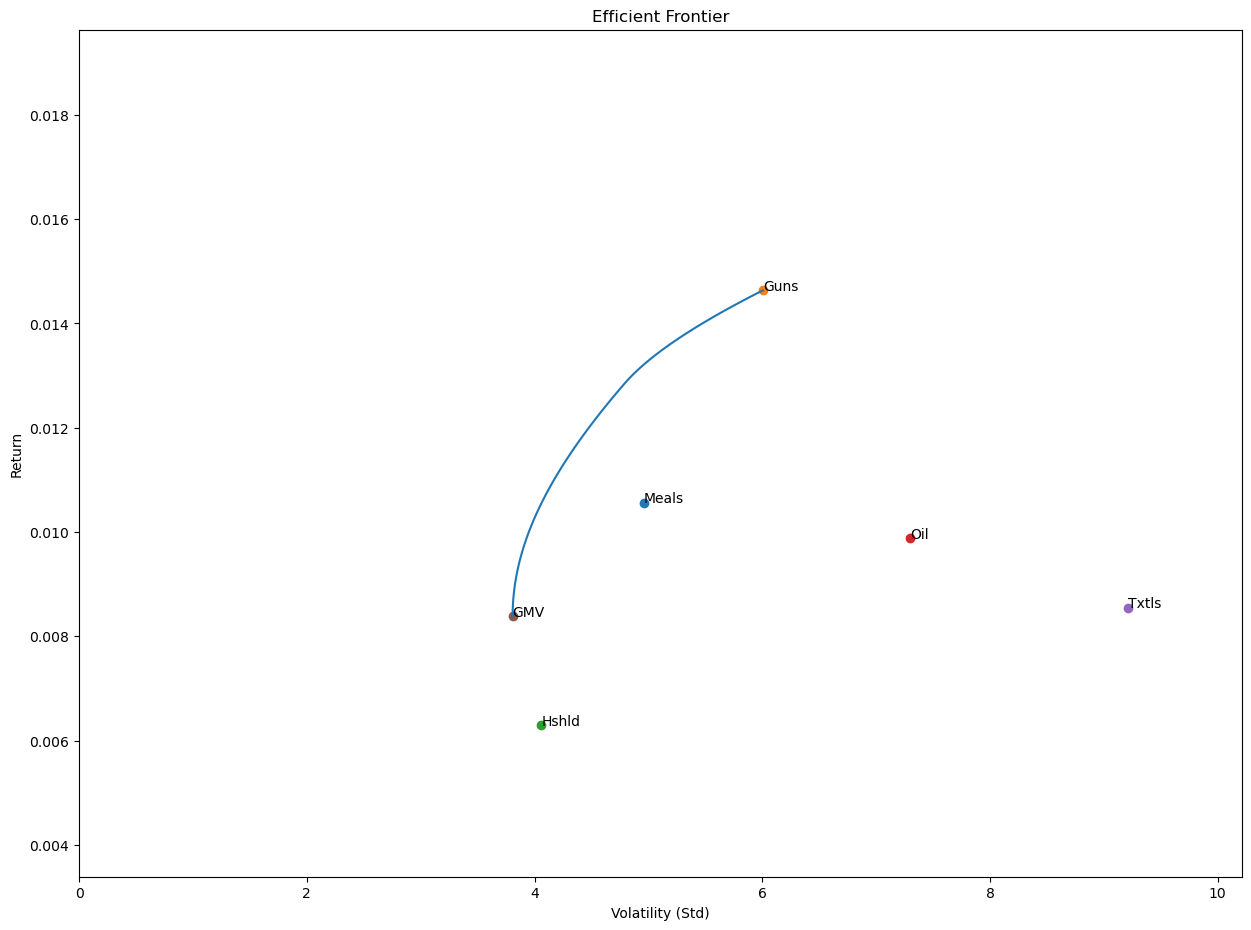

In [397]:
g.plot_ef_Gurobi(E_return, E_cov, Expected_Risk_free, K, Nbr_PTF, bounds = (0,1), show_cml=False, show_gmv=True)

#### h-(e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

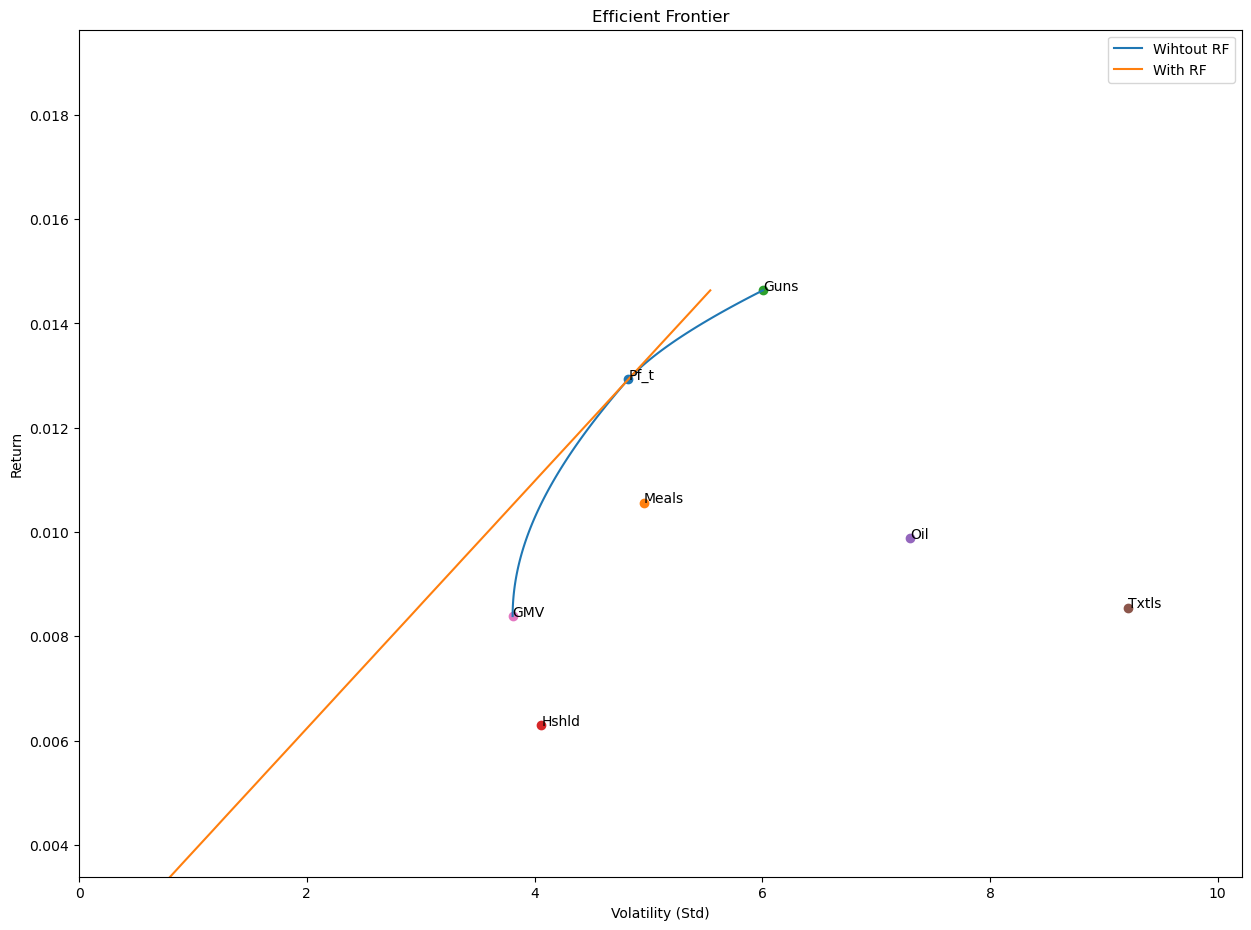

In [398]:
g.plot_ef_Gurobi(E_return, E_cov, Expected_Risk_free, K, Nbr_PTF, bounds = (0,1), show_cml=True, show_gmv=True)

#### h-(f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [399]:
#Trouver portefeuille maximum sharp ratio
result = g.tangent_Gurobi(E_return, E_cov, Expected_Risk_free, K, Nbr_PTF, bounds= (0,1))
result


,Meals,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
72,0.418,0.582,0.0,0.0,0.0,0.012931,4.824841,0.002371


## Question 2

### (a) Implement the portfolio resampling approach to demonstrate the effect of estimation uncertainty on the mean-variance frontier and tangent portfolios computed in Question 1.

#### Result presentation : 

#### Determination of the maximum return portfolio (without short sell) :

### (b) Instead of choosing 5 industries randomly as you did in Question 1, find the 5 industries among the 48 industries that maximize the Sharpe ratio with and without short selling constraints. Propose and implement methods to identify industries and their weights.

Look at the excess return per st deviation for combinations of 5 industrie portfolio (To continue)

# À faire : 

- Fonction pour avoir le portefeuille tangente (Fait)
- Plot frontiere efficiente (Sans RF) + avec assets pour visualiser le portefeuille tangente  (Fait)
- Créer une fonction a l'aide matplotlib.pyplot afin de faire de beaux graphes (Fait)
- On pourrait mettre les returns + volatilité annualisées (Fait)
- Répondres aux questions
- Améliorer fonctions pour 3 industries (Fait)



Si on a le temps:
- Trouver une méthodologie pour calculer les Returns des assets (Vincent semblait avoir une méthode)
- Trouver une méthodologie pour calculer la matrice de covariance (À voir)